In [44]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
#from google.colab import drive
#drive.mount('/content/drive')

In [46]:

# Mounting Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
import csv
# Specifying the path to the dataset file
file_path = '/content/zomato.csv'

# Reading the dataset into a Pandas DataFrame
#df = pd.read_csv(file_path,encoding = 'ISO-8859-1',  low_memory = False)
df = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip', engine='python')

# Displaying the first few rows of the dataset to ensure it's loaded correctly
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [47]:
# Checking dataset size
df.shape

(5189, 17)

In [48]:
# Checking columns in dataset
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [49]:
# Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          5189 non-null   object
 1   address                      5189 non-null   object
 2   name                         5189 non-null   object
 3   online_order                 5189 non-null   object
 4   book_table                   5189 non-null   object
 5   rate                         4494 non-null   object
 6   votes                        5189 non-null   int64 
 7   phone                        5103 non-null   object
 8   location                     5188 non-null   object
 9   rest_type                    5166 non-null   object
 10  dish_liked                   2200 non-null   object
 11  cuisines                     5184 non-null   object
 12  approx_cost(for two people)  5178 non-null   object
 13  reviews_list                 5189

In [50]:
# Checking for null values
df.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                            695
votes                             0
phone                            86
location                          1
rest_type                        23
dish_liked                     2989
cuisines                          5
approx_cost(for two people)      11
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [51]:
#Dropping the column "dish_liked", "phone", "url"
df.drop(columns=['url','phone','dish_liked'],axis=1,inplace=True)

#Remove the NaN values from the dataset
df.dropna(axis=0,inplace=True)

#Removing the Duplicates
df.duplicated().sum()
df.drop_duplicates (inplace=True)

#Changing the column names
df = df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})

#Removing '/5' from Rates
df = df.loc[df.rate != 'NEW']
df =df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df. rate = df.rate.apply(remove_slash).str.strip().astype('float')

#Changing the cost to string
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)

<ipython-input-51-3a47ffd19c65>:17: DeprecationWarning:

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [52]:
df['online_order']=df['online_order'].replace(('Yes','No'),(1,0))
df['book_table']=df['book_table'].replace(('Yes','No'),(1,0))

df.drop('address',axis=1,inplace=True)

In [53]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [54]:
df.dropna(axis=0,inplace=True)

In [55]:
df['reviews_list']=df['reviews_list'].apply(lambda x:x.replace('\\n',''))
df['menu_item']=df['menu_item'].apply(lambda x:x.replace('\\n',''))

In [56]:
df['reviews_list']=df['reviews_list'].str.lower().str.replace('[^\w\s]','')
df['cuisines']=df['cuisines'].str.lower().str.replace('[^\w\s]','')
df['menu_item']=df['menu_item'].str.lower().str.replace('[^\w\s]','')

<ipython-input-56-c97000b86395>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-56-c97000b86395>:2: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-56-c97000b86395>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [57]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [58]:
# Computing Mean Rating
restaurants = list(df['name'].unique())
df['Mean Rating'] = 0
for i in range(len(restaurants)):
  df['Mean Rating'][df['name'] == restaurants[i]] = df['rate'][df['name'] == restaurants[i]].mean()
#Scaling the mean rating values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range = (1,5))
df[['Mean Rating']] = scaler.fit_transform(df[['Mean Rating']]).round(2)

<ipython-input-58-98c4e9f2bc71>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
df[['name','rate','Mean Rating','cuisines','cost']].head()

,name,rate,Mean Rating,cuisines,cost
0,Jalsa,4.1,3.81,north indian mughlai chinese,800.0
1,Spice Elephant,4.1,3.81,chinese north indian thai,800.0
2,San Churro Cafe,3.8,3.37,cafe mexican italian,800.0
3,Addhuri Udupi Bhojana,3.7,3.22,south indian north indian,300.0
4,Grand Village,3.8,3.37,north indian rajasthani,600.0


In [60]:
# Extract the required columns
restaurant1_df = df[['name','rate','Mean Rating','cuisines','cost']]

# Save the new DataFrame to a CSV file
restaurant1_df.to_csv('restaurant1.csv', index=False)

In [61]:
from google.colab import files
files.download('restaurant1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
#Removing stopwords
from nltk.corpus import stopwords

In [63]:
#stop=set(stopwords.words('english'))
#def remove_stop(text):
#    return " ".join([i for i in str(text).split() if i not in stop])

# **Text Preprocessing and Cleaning**

In [64]:
## Lower Casing
df["reviews_list"] = df["reviews_list"].str.lower()
## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
  """custom function to remove the punctuation"""
  return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df["reviews_list"] = df["reviews_list"].apply(lambda text: remove_punctuation (text))

In [65]:
df[['reviews_list','cuisines']].sample(5)

,reviews_list,cuisines
2038,rated 40 rated i would actually rate this pla...,biryani kebab
138,rated 30 rated taste 355great place for quic...,north indian fast food rolls
405,rated 40 rated been here for dinner with fami...,north indian
788,rated 50 rated small place in d aspect of siz...,desserts beverages
845,rated 30 rated regular burger joint n actuall...,burger fast food beverages


<ipython-input-66-3664067db4e9>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Number of outlets')

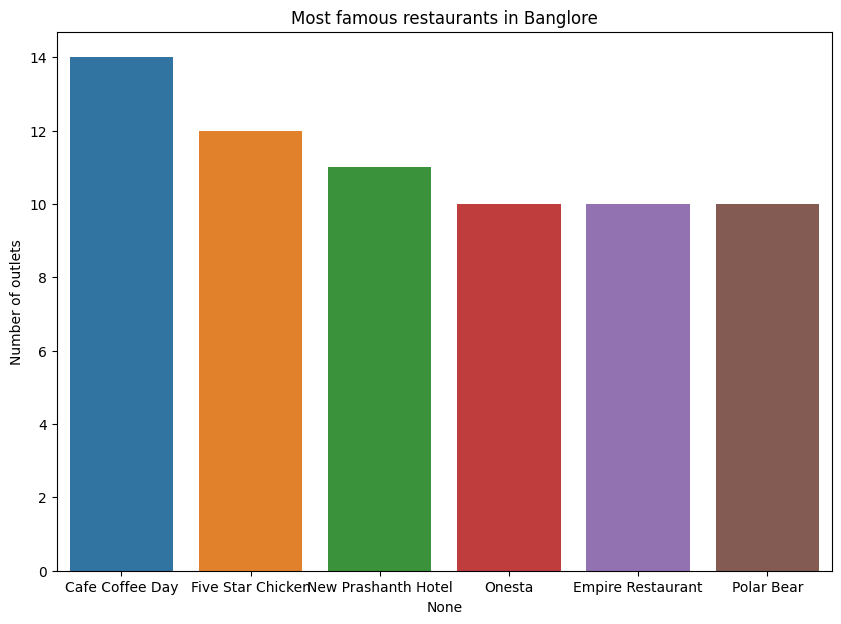

In [66]:
# Most famous 6 restaurants in Banglore
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:6]
sns.barplot(x=chains.index,y=chains,palette='tab10')
plt.title("Most famous restaurants in Banglore")
plt.ylabel("Number of outlets")

<ipython-input-67-b74495607c2c>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




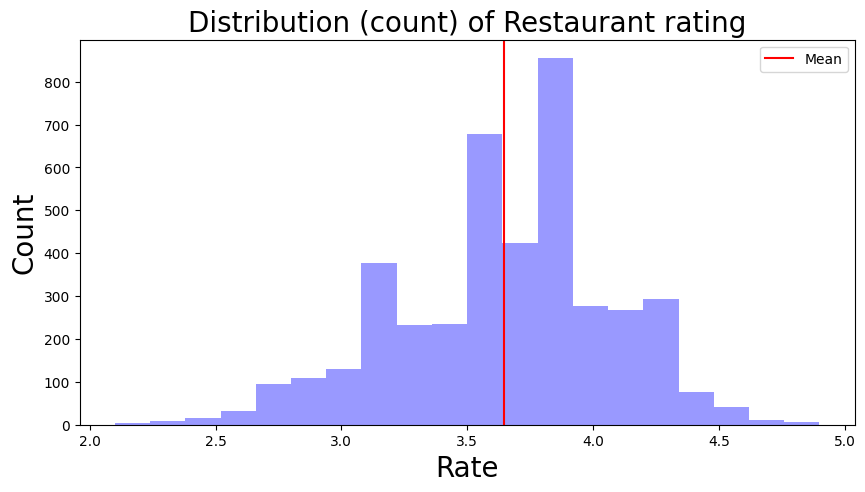

In [67]:
#Distribution of Restaurant Rating
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.distplot(df.rate, kde=False, color = 'b',ax =ax,bins=20);
ax.axvline(df.rate.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Rate',size=20)
ax.set_title('Distribution (count) of Restaurant rating',size=20);

<ipython-input-68-8090f0dda435>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




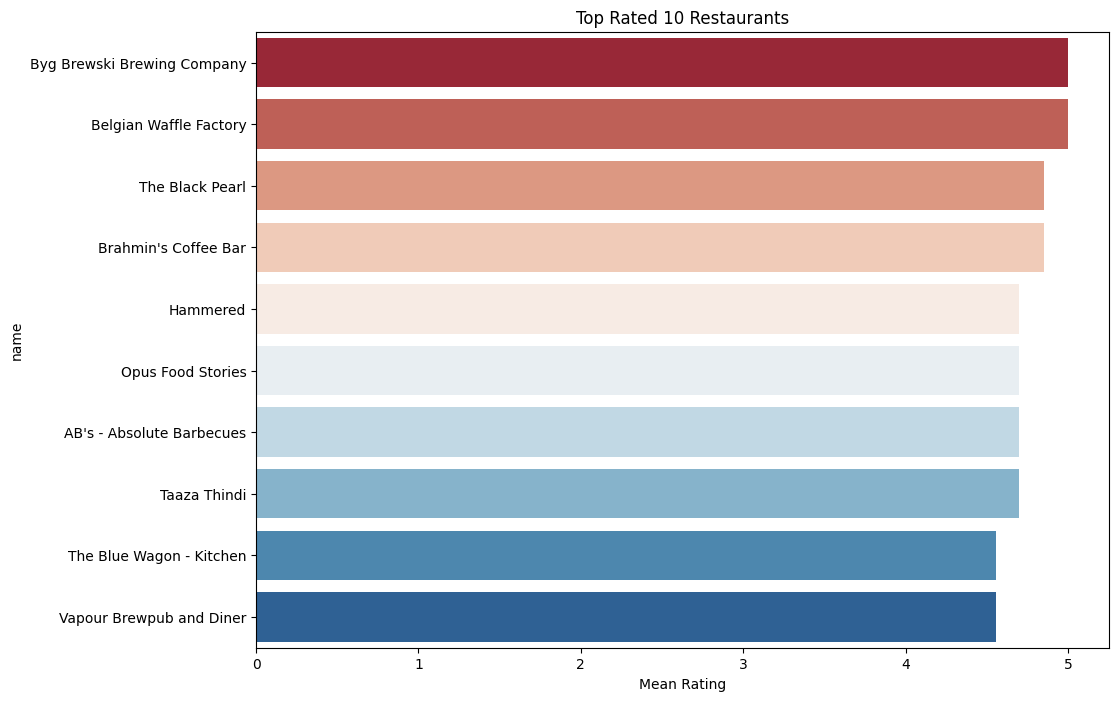

In [68]:
# Top 10 Rated Restaurants
df_rating = df.drop_duplicates (subset='name')
df_rating = df_rating.sort_values(by='Mean Rating', ascending=False).head(10)
plt.figure(figsize=(11,8))
sns.barplot(data=df_rating, x='Mean Rating', y='name', palette='RdBu')
plt.title('Top Rated 10 Restaurants');

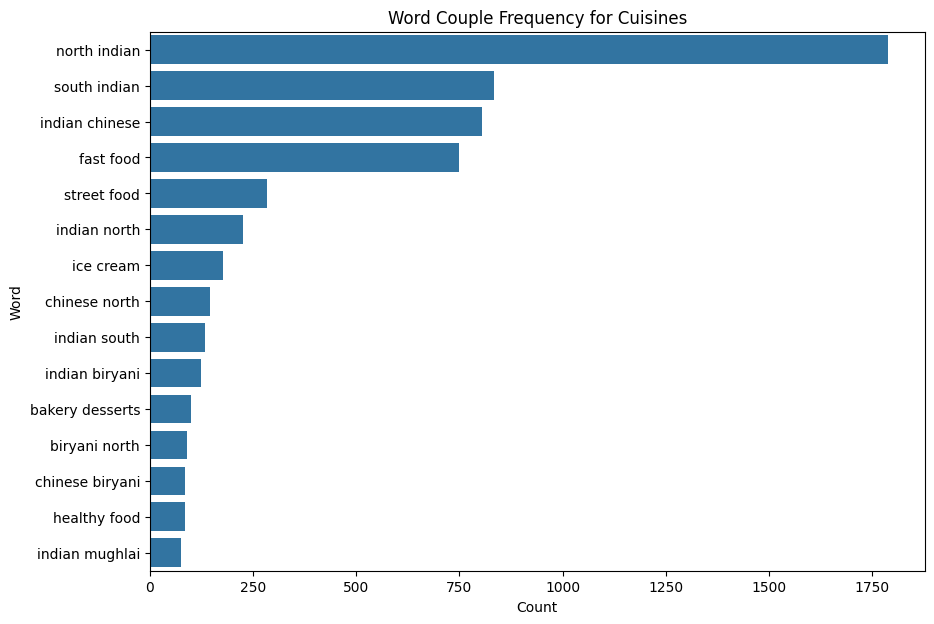

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to get the top two-word frequencies
def get_top_words(text_series, n, ngram_range):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(text_series)
    word_count = X.sum(axis=0)
    word_count = sorted(list(zip(vectorizer.get_feature_names_out(), word_count.tolist()[0])), key=lambda x: x[1], reverse=True)
    return word_count[:n]

# Assuming you have defined or imported the function, you can now use it
lst = get_top_words(df['cuisines'], 15, (2, 2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])

# Create a bar plot to visualize the top two-word frequencies
plt.figure(figsize=(10, 7))
sns.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines')
plt.show()


In [70]:
df=df.drop(['menu_item', 'votes'],axis=1)

# Randomly sample 60% of your dataframe
df_percent = df.sample(frac=0.5)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [72]:
def recommend(name, cosine_similarities = cosine_similarities):

    # Create a list to put top restaurants
    recommend_restaurant = []

    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]

    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)

    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)

    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])

    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])

    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))

    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)

    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    df_new.index = df_new.index.str.lower()
    return df_new


In [74]:
recommend('Jalsa')

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

TOP 10 RESTAURANTS LIKE Jalsa WITH SIMILAR REVIEWS: 


<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

,cuisines,Mean Rating,cost
the black pearl,north indian european mediterranean bbq,4.85,1.5
jalsa gold,north indian mughlai italian,4.41,1.3
hakuna matata,north indian asian seafood chinese,4.41,1.2
foxtrot,north indian chinese continental momos,4.26,1.2
barbecoa,north indian continental chettinad andhra bengali,4.11,1.0
mug n bean,cafe continental italian burger,3.52,400.0
b.m.w - bhookh mitaane wala,north indian south indian chinese,3.22,500.0
prasiddhi food corner,fast food north indian south indian,3.22,200.0
chef's gallery,chinese italian north indian,2.93,700.0
red chilli restaurant,north indian chinese,2.48,350.0


In [78]:
recommend("Domino's Pizza")

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

TOP 10 RESTAURANTS LIKE Domino's Pizza WITH SIMILAR REVIEWS: 


<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,cuisines,Mean Rating,cost
mug n bean,cafe continental italian burger,3.52,400.0
coffee tindi,cafe south indian,3.37,200.0
b.m.w - bhookh mitaane wala,north indian south indian chinese,3.22,500.0
prasiddhi food corner,fast food north indian south indian,3.22,200.0
nammura donne biriyani,mughlai biryani,2.83,400.0
anda ka funda,north indian chinese rolls,2.78,250.0
sri krishna sagar,south indian north indian chinese street food ...,2.60,400.0
sri krishna sagar,north indian chinese,2.60,400.0
bendakaluru bytes,fast food,2.48,300.0
fresh dinner,north indian biryani,2.33,500.0


In [79]:
recommend('Spice Up')

TOP 10 RESTAURANTS LIKE Spice Up WITH SIMILAR REVIEWS: 


<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

,cuisines,Mean Rating,cost
mug n bean,cafe continental italian burger,3.52,400.0
spice up,chinese,3.37,600.0
b.m.w - bhookh mitaane wala,north indian south indian chinese,3.22,500.0
magix's parattha roll,fast food north indian chinese mughlai rolls,3.22,400.0
prasiddhi food corner,fast food north indian south indian,3.22,200.0
wahab,north indian mughlai chinese,3.22,350.0
swad restaurant,chinese north indian,3.22,550.0
lalchee's rasoi,north indian chinese,3.07,500.0
nammura donne biriyani,mughlai biryani,2.83,400.0
the curry hut plus,north indian south indian chinese,2.78,400.0


In [80]:
recommend('Desi Inn')

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

TOP 10 RESTAURANTS LIKE Desi Inn WITH SIMILAR REVIEWS: 


<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-cbb4c7391aec>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

,cuisines,Mean Rating,cost
the black pearl,north indian european mediterranean bbq,4.85,1.5
sarjapur social,american north indian chinese finger food,4.56,1.5
float,north indian japanese,4.26,1.5
maia - eat | bake | mom,continental north indian beverages,4.11,1.2
anand sweets and savouries,mithai street food,3.96,400.0
mini punjabi dhaba,north indian,3.96,350.0
shudh,north indian,3.81,300.0
maa bhook lagi,north indian,3.81,400.0
murli,north indian chinese street food fast food mithai,3.52,500.0
swad punjab da,north indian,3.44,150.0
